# A Clique of Dividing Numbers

Not a real name. The task: given a set of integers, all of them unique, find the largest (in terms of the number of elements) subset of them, so that for all pairs of numbers a,b in this subset either a divides b, or b divides a.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [53]:
def create_set_tight(n=None):
    """Creates a set of n numbers to test the algorithm"""
    if n is None:
        n = np.random.randint(20)
    nprimes = np.random.randint(low=3,high=max(np.floor(n*0.3),5)) # Probability of including new primes
    print('N primes:',nprimes)
    
    i = 2
    primes = [2] # Generate n primes (1 will be added at the end)
    while len(primes) < n-1:
        i += 1
        if not any([bool(i % j ==0) for j in primes]):
            primes.append(i)
    primes = [1] + primes
    
    out = []
    for i in range(nprimes): # Pick nprimes at random
        out.append(primes.pop(np.random.randint(len(primes))))
        
    for i in range(nprimes,n):
        while True:
            pickp = out[np.random.randint(nprimes)]  # One of the primes
            pickb = np.random.randint(1,n) # Some other number
            if pickb*pickp not in out:
                out.append(pickb*pickp)
                break
        
    return out


def augment_set(x,n=None):
    '''Adds other random numbers to the set'''
    if n is None: n = 2*len(x)
    out = x[:]
    max_value = max(x) + n - len(x) # A very safe value that should work for both small and large arrays
    while len(out)<n:
        pick = np.random.randint(max_value)
        if pick not in out:
            out.append(pick)    
    return out


    
x = create_set_tight(100)
print(x)
x = augment_set(x)
print(x)

N primes: 5
[1, 269, 83, 239, 467, 2158, 19368, 18, 21510, 15, 34091, 2421, 16947, 23672, 15535, 28487, 18023, 82, 14101, 7055, 95, 2959, 1826, 27086, 15774, 1909, 7532, 58, 32690, 21482, 4399, 21520, 20, 87, 12105, 43898, 7, 33, 36893, 1195, 16, 26, 17746, 2739, 13862, 9340, 6692, 13988, 14818, 11567, 4648, 17447, 15333, 86, 84, 1328, 13076, 7887, 5976, 9082, 3486, 35492, 19120, 24751, 80, 19614, 59, 99, 2390, 37360, 1162, 57, 5380, 38, 38294, 6723, 3585, 6187, 4035, 11298, 22944, 6308, 24210, 63, 12374, 8, 2629, 9953, 11233, 8126, 2690, 6391, 3403, 1868, 12643, 17279, 7648, 7885, 1245, 43431]
[1, 269, 83, 239, 467, 2158, 19368, 18, 21510, 15, 34091, 2421, 16947, 23672, 15535, 28487, 18023, 82, 14101, 7055, 95, 2959, 1826, 27086, 15774, 1909, 7532, 58, 32690, 21482, 4399, 21520, 20, 87, 12105, 43898, 7, 33, 36893, 1195, 16, 26, 17746, 2739, 13862, 9340, 6692, 13988, 14818, 11567, 4648, 17447, 15333, 86, 84, 1328, 13076, 7887, 5976, 9082, 3486, 35492, 19120, 24751, 80, 19614, 59, 99, 2

In [3]:
# One of the test cases form LeetCode:
x0 = [832,33,531,416,335,298,365,352,582,936,366,305,930,530,97,349,71,295,840,108,299,804,925,627,953,571,658,732,429,
      136,563,462,666,330,796,315,695,500,896,982,217,200,912,98,297,612,169,943,628,593,959,904,219,240,857,789,897,
      940,569,384,502,382,401,184,716,230,29,963,211,597,515,122,163,86,215,105,889,842,49,847,267,87,954,407,245,975,
      719,746,709,471,281,238,186,510,618,149,73,214,663,194,260,825,631,474,519,668,329,718,765,947,156,353,490,962,679,
      560,59,387,31,692,976,568,201,273,159,730,819,418,906,801,892,672,559,866,389,675,812,744,164,737,57,195,115,933,
      158,909,598,359,853,314,983,11,395,153,781,301,838,625,704,256,351,996,225,644,521,509,674,417,272,622,937,723,632,
      331,228,412,181,435,469,157,368,524,38,132,325,420,127,731,771,604,505,634,67,374,894,3,448,878,686,641,316,207,
      76,363,795,235,770,446,820,493,177,816,615,410,117,944,829,190,831,289,516,964,170,134,671,885,682,119,402,82,485,
      901,375,68,858,739,56,974,683,884,815,872,715,104,290,348,588,834,788,472,466,867,550,779,65,802,459,440,870,753,
      608,808,623,642,44,437,865,758,540,506,691,958,854,546,39,595,369,504,63,311,722,441,786,899,338,651,874,946,811,
      848,939,284,824,309,653,133,514,460,678,54,399,759,468,61,480,783,266,900,400,237,403,534,213,914,473,198,380,373,
      288,154,844,535,409,249,285,168,69,345,647,851,846,264,102,246,106,648,576,212,438,981,987,379,360,667,95,172,101,
      580,891,385,747,161,927,361,818,657,171,342,232,734,714,362,425,475,28,41,551,142,131,51,229,9,607,326,522,687,792,
      845,665,358,91,720,155,565,99,26,650,539,780,589,950,935,372,227,424,750,833,554,841,552,60,757,430,916,140,790,
      426,776,96,199,923,806,949,755,711,659,911,611,310,774,265,880,690,706,761,286,255,756,204,444,478,601,529,669,241,
      784,566,528,208,270,511,236,271,378,58,453,467,233,250,567,296,932,989,367,626,35,162,887,572,603,564,797,280,406,
      970,689,408,431,638,489,85,50,357,803,47,555,793,422,763,110,869,861,253,320,538,347,405,769,64,875,630,537,328,
      553,166,948,303,160,800,507,920,922,90,693,636,17,455,183,210,856,762,656,174,873,579,176,688,640,1,938,902,341,
      740,581,427,111,972,443,22,791,304,574,575,725,477,700,817,381,479,248,121,411,547,182,871,599,203,13,224,541,
      724,178,775,388,4,251,321,52,88,100,279,614,839,84,151,735,40,752,773,376,77,476,708,396,988,961,24,231,445,609,
      952,965,986,414,451,881,42,257,32,334,130,596,527,94,333,317,244,960,710,852,862,421,81,37,452,274,187,268,520,491,
      778,18,743,620,145,72,370,118,748,633,997,436,143,573,495,180,34]
expected = [1,3,9,18,90,180,360,720]

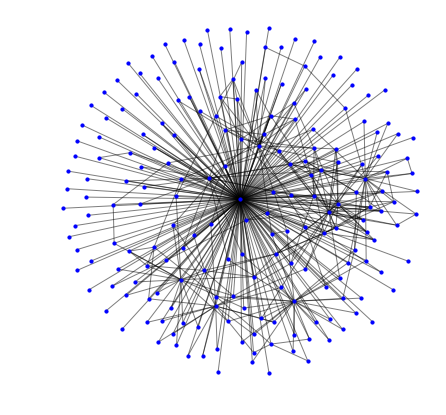

In [55]:
def find_edges(x):
    m = {}
    for i in x:
        m[i] = [j for j in x if ((j % i ==0) or (i % j ==0)) and (j != i)]
        
    return [(i,j) for i in x for j in m[i]]
    
def visualize(m):
    G = nx.Graph()
    G.add_edges_from(m)
    #nx.draw_kamada_kawai(G)
    pos=nx.spring_layout(G, iterations=50) # positions for all nodes
    
    plt.figure(figsize=(7,7))
    ax = plt.axes()
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color="blue")
    nx.draw_networkx_edges(G, pos, width=1.0,alpha=0.5)
    plt.axis('off')
    plt.show()
    #nx.draw_networkx_labels(G,pos,labels,font_size=16)
    
    
visualize(find_edges(x))